---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Edson Murillo**
- Carné: **B85519**
- Grupo: **1**
- Estudiante: **Juan Rafael Quesada Villegas**
- Carné: **B86252**
- Grupo: **1**


# `P5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

## Parte 1
 Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

$\lambda = 7$

$V = 0.25$.


Dado que deben de haber 100 personas o menos se formula la siguiente ecuación:

$P(101 persnas o más)=\sum_{i=101}^\infty{(1-p)p^i}=\sum_{i=0}^{100}{p^101}$

También es importante considerar:

$p=\frac{7}{0.25s}=\frac{28}{s}$

Es importante considerar que p<1, por ende s tiene que tener un valor como el mostrado a continuacion:


$\frac{7}{0.25s}\prec{1}$

$28\prec{s}$


Por ende considerando el $5%$ restante del 95%, lo cual resulta en la siguiente ecuación:

$P(101 persnas o más)\leq{0,05}$

$p^{101}\leq{0,05}$

$\frac{28}{s}\leq{0,05}$

$s\approx{28.8429}=29$

Esto último es constante con lo propuesto en los

## Parte 2
Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

En este caso, se observa que el valor teórico hallado es de 29 puestos de vacunación necesarios para tener menos de 100 personas en fila el 95% del tiempo. Para comprobar este resultado se realizarán 3 simulaciones: con s = 29, s = 20 y s = 32. Con ello se espera comprobar que en menos de 29 puestos no se satisface la condición y que entre mayor sea el número de puestos, menor el número de personas en fila. Para ello, se crea una función que realiza la simulación y grafique el resultado para luego comprobar con distintos parámetros.

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Debido a que se realizan 3 simulaciones (Número de servidores exacto, menor y más), se crea una función para simplifcar el código.

'''
@func simulacion: Revisar los parámetros a cumplir
@param lam: Razón de llegada
@param nu: Razón de servicio (salida)
@param N: Número de clientes
@param s: Número de servidores
'''
def simulacion(lam, nu, N, s):
    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/(s * nu))

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0] # primera llegada
    fin = inicio + t_servicio[0] # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 101 # 100 personas en fila

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P:
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
    print('\t{:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05: ###
        print('\tSí cumple con la especificación.')
    else:
        print('\tNo cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.title('Simulación con {} servidores.'.format(s))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 5000))
    plt.show()

Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 99 solicitudes en fila:
	0.00%
	Sí cumple con la especificación.
Simulación es equivalente a 6.42 horas.


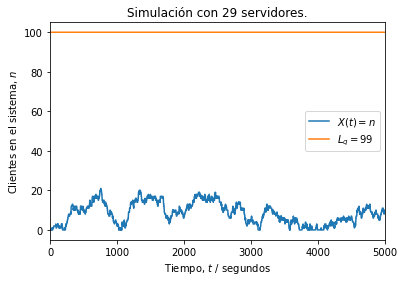

In [9]:
# Primera simulación

# Número de clientes
N = 2500

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Número de servidores (valor teórico)
s = 29

# Comprobación del resultado teórico
simulacion(lam, nu, N, s)

## Análisis con s = 29
El resultado teórico obtenido fue de 29 servidores. En otras palabras, se necesitan de 29 puestos de vacunación como mínimo para cumplir con el requisito de que no se presenten filas de más de 100 personas el 95% del tiempo. En la gráfica obtenida anteriomente se puede observar que al realizar la simulación con un número de 2500 personas que llegan a vacunarse, se cumple que el 100% del tiempo (6.42 h) no se sobrepasaba el valor de 100 personas en cada fila. Esto con lo valores establecidos de $\lambda = 7$ personas por minuto y $\nu = 0.25$ personas por minuto.

Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 99 solicitudes en fila:
	88.73%
	No cumple con la especificación.
Simulación es equivalente a 8.60 horas.


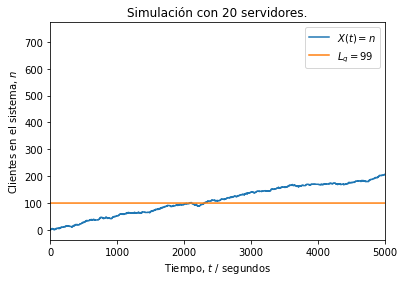

In [11]:
# Segunda simulación

# Número de clientes
N = 2500

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Número de servidores (valor menor al teórico)
s = 20

# Comprobación del resultado menor al teórico
simulacion(lam, nu, N, s)

## Análisis con s = 20

En la segunda simulación se utilizaron 20 servidores, que es menor al valor de 29 hallado teóricamente como mínimo. En la gráfica anterior se puede observar que no se cumple con las condiciones definidas. En este caso, el 88.73% del tiempo se tienen más de 100 personas en fila. Recordar que se siguen utilizando los mismos valores de $\lambda$ y $\nu$. El resultado es el esperado, ya que s $\ge$ 29 determinaba el valor mínimo a cumplir. Se puede observar un comportamiento creciente en la gráfica, que determina que el número de personas en fila aumenta con el paso del tiempo.

Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 99 solicitudes en fila:
	0.00%
	Sí cumple con la especificación.
Simulación es equivalente a 6.30 horas.


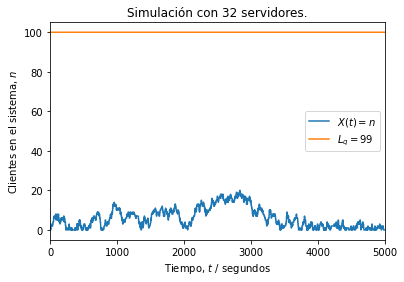

In [12]:
# Tercera simulación

# Número de clientes
N = 2500

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Número de servidores (valor mayor al teórico)
s = 32

# Comprobación del resultado mayor al teórico
simulacion(lam, nu, N, s)

## Análisis con s = 32

Por último, en la tercera simulación se utiliza un valor de 32 servidores, superior al hallado teóricamente. El resultado esperado es que el 100% del tiempo se tengan menos de 100 personas en fila, ya que se tiene un valor de servidores mayor el requerido, por lo que se pueden repartir el total de personas entre más puestos. Esto último, si se compara con la simulación de 29 servidores, se puede ver que en efecto se tiene un menor número de personas en fila durante las 6.30 h de simulación. En la gráfica anterior se puede observar que se cumple con el resultado esperado y las condiciones predefinidas. Esto finalmente comprueba el resultado de 29 puestos de vacunación requeridos para satisfacer que halla menos de 100 personas el 95% del tiempo.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---